<a href="https://colab.research.google.com/github/PosgradoMNA/ML2-Equipo_7-sep-2023/blob/main/A2b_DL_TC5033_AD2023_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [ ]:
pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader #Base de datos
from torch.utils.data import sampler #Hacer Muestras a partir del DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as T #transformación a los datos
import matplotlib.pyplot as plt
#only if you have jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

In [ ]:
# The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name CIFAR-10)1.
# Classes include common objects such as airplanes, cars, birds, cats, etc.
# The data set is divided in a standard way, where 50,000 images are used.
# for the training of a model and the remaining 10,000 to evaluate its performance.
# The images are in all 3 channels (red, green, and blue) and are small squares measuring 32 x 32 pixels.

### Download Cifar10 dataset

The Canadian Institute for Advanced Research developed a standard computer vision and deep learning dataset for this problem. (CIFAR). The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name CIFAR-10)1. Classes include common objects such as airplanes, cars, birds, cats, etc. in. The data set is divided in a standard way, where 50,000 images are used for training a model and the remaining 10,000 to evaluate its performance. The images are in all 3 channels (red, green and blue) and are small squares measuring 32 x 32 pixels.

Download the data from Pytorch:

In [ ]:
torch.cuda.is_available()

False

In [ ]:
# Define the path to your data

DATA_PATH = '/your_path' # Define where images are saved (Global instance)
NUM_TRAIN = 50000 # Training constant (50000 training and 10000 tests)
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64 # (Appropiated), 32,16,128

# Use CIFAR data set

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261]) # Known values for the DataSet
            ]) # Transform module, allows the user to make modifications to the images to have enlarged images (Data augmentation, more data synthetically)
              # SD1, MEDIA 0, (Red, green and blue, media and SD for one of the channels)

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar) # Group all training data and labels into one object and apply transformation.
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, # Convert the Dataset into a data loader, make the objects iterable to generate mini-bumps.
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN))) # Sampler train loader that sampling is random in the range of the first 50,000.
# Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar) # Take the data from the original data
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

100%|██████████| 170498071/170498071 [00:08<00:00, 20281315.93it/s]


Extracting /your_path/cifar-10-python.tar.gz to /your_path
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
cifar10_train # General information, convert to tensor and normalize

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /your_path
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [ ]:
train_loader.batch_size # Determine the batch size for the train_loader

64

In [ ]:
test_loader.dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /your_path
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [ ]:
# Print each one of the elements contained in the train_loader

for i, (x, y) in enumerate(train_loader):
    print(x, y)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
          [-3.0824e-02,  3.3729e-02,  2.4352e-01,  ...,  5.6629e-01,
            5.0173e-01,  4.6946e-01]],

         [[-1.3070e+00, -1.2318e+00, -9.4636e-01,  ...,  1.1722e+00,
            1.2924e+00,  1.0069e+00],
          [-1.1417e+00, -1.1717e+00, -1.1267e+00,  ...,  5.2611e-01,
            7.0641e-01,  4.6601e-01],
          [-1.3070e+00, -1.3220e+00, -1.2619e+00,  ...,  1.8053e-01,
            2.2560e-01,  4.5301e-02],
          ...,
          [-5.7073e-01, -3.6038e-01, -3.6038e-01,  ..., -3.7540e-01,
           -6.7591e-01, -4.9561e-01],
          [-3.6038e-01, -3.7540e-01, -3.1530e-01,  ..., -1.4800e-02,
           -3.4535e-01, -2.8525e-01],
          [-3.3033e-01, -3.1530e-01, -1.5003e-01,  ..., -1.4800e-02,
           -8.9926e-02, -7.4900e-02]]],


        [[[-1.9243e+00, -1.5909e+00, -1.4639e+00,  ..., -1.9720e+00,
           -1.9720e+00, -1.9561e+00],
          [-1.9402e+00, -1.9402e+00, -1.9402e+00,  ..., 

In [ ]:
for i, (x, y) in enumerate(test_loader): # It will return training data with its respective label with each iteration, converting the dataset into iterable objects.
    print(i, x.shape, y.shape) # 64 objects, each object of 3, size of 32X32 pixels, class to which each image corresponds ([64]).

0 torch.Size([64, 3, 32, 32]) torch.Size([64])
1 torch.Size([64, 3, 32, 32]) torch.Size([64])
2 torch.Size([64, 3, 32, 32]) torch.Size([64])
3 torch.Size([64, 3, 32, 32]) torch.Size([64])
4 torch.Size([64, 3, 32, 32]) torch.Size([64])
5 torch.Size([64, 3, 32, 32]) torch.Size([64])
6 torch.Size([64, 3, 32, 32]) torch.Size([64])
7 torch.Size([64, 3, 32, 32]) torch.Size([64])
8 torch.Size([64, 3, 32, 32]) torch.Size([64])
9 torch.Size([64, 3, 32, 32]) torch.Size([64])
10 torch.Size([64, 3, 32, 32]) torch.Size([64])
11 torch.Size([64, 3, 32, 32]) torch.Size([64])
12 torch.Size([64, 3, 32, 32]) torch.Size([64])
13 torch.Size([64, 3, 32, 32]) torch.Size([64])
14 torch.Size([64, 3, 32, 32]) torch.Size([64])
15 torch.Size([64, 3, 32, 32]) torch.Size([64])
16 torch.Size([64, 3, 32, 32]) torch.Size([64])
17 torch.Size([64, 3, 32, 32]) torch.Size([64])
18 torch.Size([64, 3, 32, 32]) torch.Size([64])
19 torch.Size([64, 3, 32, 32]) torch.Size([64])
20 torch.Size([64, 3, 32, 32]) torch.Size([64])
21

### Using  GPUs

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: horse


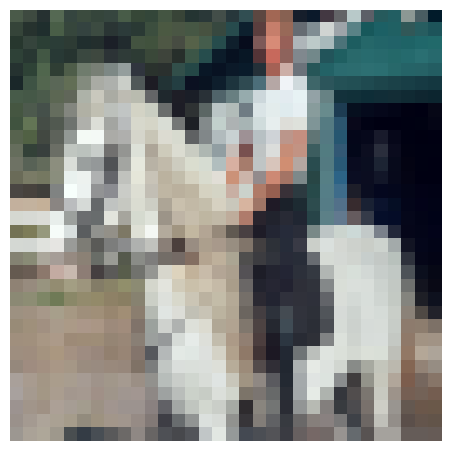

In [ ]:
# Create a function to show the obtained image

classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'The sampled image represents a/an: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


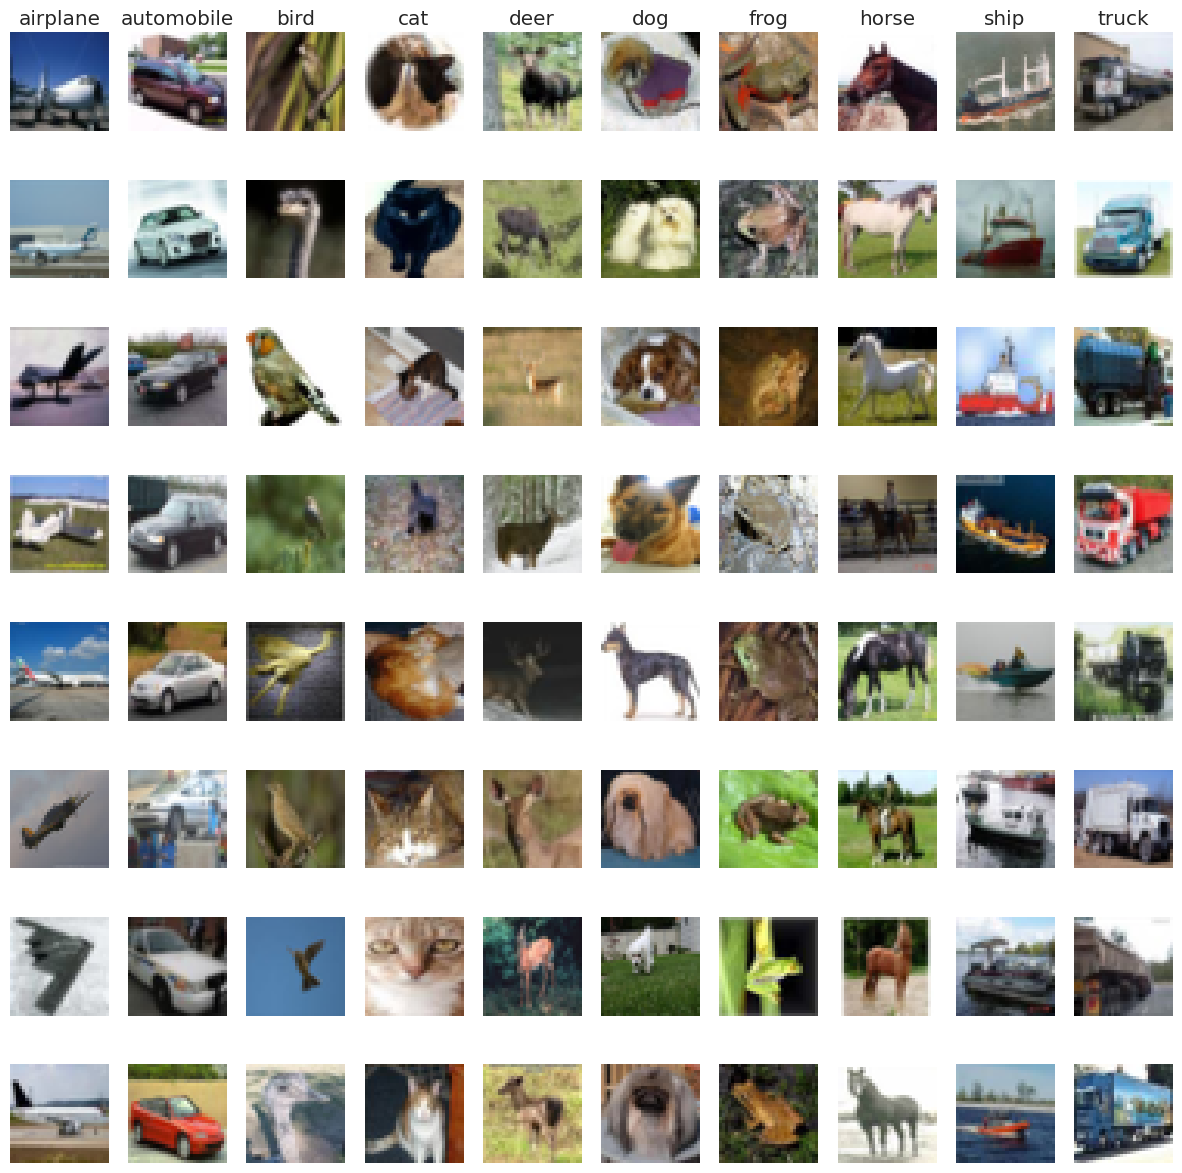

In [ ]:
# Define a plot function to exhibit the multiple sampled images from the testing dataset

def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [ ]:
# Define a function to calculate the accuracy for the model

def accuracy(model, loader):# Model and data loader that will allow to iterate through the data, through the minibatches
  num_correct = 0 # Number of true values
  num_total = 0 # Number of total images
  model.eval() # Model in evaluation mode, some layers behave differently in evaluation mode or in training mode like the batch normalization layer.
               # The focus is just in accuracy, not interested in training
  model = model.to(device=device) # Make sure the model is on the GPU device that it's using to train
  with torch.no_grad(): # Accuracy is calculated, not gradient.
      for xi, yi in loader: # The mini-batches are sending to be generated directly from the Dataloader.
          xi = xi.to(device=device, dtype = torch.float32) # Pass the data to the GPU, both images and labels.
          yi = yi.to(device=device, dtype = torch.long) # Labels.
          scores = model(xi) # Run the models and it's obtained the scores.
          _, pred = scores.max(dim=1) # From scores is finding out which one has the max score, it returns the element index for all the elements of the minibatch, the index represents the class.
          num_correct += (pred == yi).sum() # The prediction is compared directly with the correct class for all the elements of the minibatch, in this case 64 elements, 1 where it corresponds, 0 where it does not correspond.
          # They are added and accumulated in the variable num_correct, of 64 elements of a minibatch, 55 are correct, it accumulates those 55.
          num_total += pred.size(0) # Total elements.

      return float(num_correct)/num_total

### Loop de entrenamiento

In [ ]:
def train(model, optimiser, epochs=100):

  model = model.to(device=device) #pasar modelo a nuestro dispositivo
  for epoch in range(epochs): #loop para numero de epochs
      for i, (xi, yi) in enumerate(train_loader):#sacar elementos del dataloader de train
          model.train() #modo entrenamiento
          xi = xi.to(device=device, dtype=torch.float32) #pasar imagenes a memoria
          yi = yi.to(device=device, dtype=torch.long)#pasar etiquetas a memoria
          scores = model(xi)#corremos modelos y nos regresa los score
          # funcion cost
          cost = F.cross_entropy(input= scores, target=yi) #función de costos
          optimiser.zero_grad() #borramos los gradientes ya calculados
          cost.backward() #mandar a llamar la función backward que nos calcula los gradientes para todos los parametros del modelo
          #es decir los gradientes de la funcion de costo con respecto a todos los parametros del modelo
          optimiser.step() #step que nos va hacer la actualización de nuestros parametros de acuerdo al optimiser que utilicemos
      acc= accuracy(model, val_loader) #calcular accuracy llamando las funcion pero con los datos de validación
      print(f'Epoch:{epoch}, costo: {cost.item()}, accuracy:{acc},') #imprimir cada epoch

### Linear model

In [ ]:
# 10 classes. The images are in all 3 channels (red, green and blue) and are small squares measuring 32 x 32 pixels.

hidden1=256
hidden =256
lr=0.0001
epochs=10
model1=nn.Sequential(nn.Flatten(),
                     nn.Linear(in_features=32*32*3, out_features=hidden1),nn.ReLU(), # First layer, input image applied to a vector, ReLU nonlinear activation function.
                     nn.Linear(in_features=hidden1, out_features=hidden),nn.ReLU(), # Second layer, the output of the first layer.
                     nn.Linear(in_features=hidden, out_features=10)) # Third layer, input is the output of the second layer, and output 10 classes

optimiser = torch.optim.Adam(model1.parameters(), lr=lr)


In [ ]:
train(model1, optimiser, epochs)

Epoch:0, costo: 1.4363418817520142, accuracy:0.4616,
Epoch:1, costo: 0.9360477328300476, accuracy:0.4916,
Epoch:2, costo: 1.532684326171875, accuracy:0.5126,
Epoch:3, costo: 1.6110762357711792, accuracy:0.523,
Epoch:4, costo: 1.2566604614257812, accuracy:0.532,
Epoch:5, costo: 1.1841676235198975, accuracy:0.539,
Epoch:6, costo: 1.2700175046920776, accuracy:0.5404,
Epoch:7, costo: 1.1007726192474365, accuracy:0.5494,
Epoch:8, costo: 0.7275224924087524, accuracy:0.5418,
Epoch:9, costo: 0.7934265732765198, accuracy:0.5442,


It can be seen that the highest performance is 54% in the last epoch, this means that the model is learning but the performance is not the most optimal.

#### Next, Sequential CNN will be implemented, with two convolutional layers and 10 output layers:

### Sequential CNN

In [ ]:
# To do: Use PyTorch to implement a CNN model, accuracy should be better than Linear model

#32*32*3 enters the first layer

channel1=16 # Number of filters in the first layer.
channel2=32 # 2 layers CNN and 1 output layer.
epochs=10
lr=0.0001
modelCNN1=nn.Sequential(nn.Conv2d(in_channels=3, out_channels=channel1,# Create CNN layers, in_channels = how many channels does the input volume have, that is, the image, 3- #out_channels = output volume, this is given by the number of filters in the first layer.
                                   kernel_size=3, padding=1), # Kernel 3*3
                        nn.ReLU(), # 32*32*16 enters in the second layer.
                        nn.Conv2d(in_channels=channel1, out_channels=channel2,# Create CNN layers, in_channels = how many channels does the input volume have, that is, the image, 3- #out_channels = output volume, this is given by the number of filters in the first layer.
                                   kernel_size=3, padding=1),
                        nn.ReLU(), # 32*32*32
                        nn.MaxPool2d(2,2), # Kernel 2*2, stride 2 split by the half of the input images. Later of MaxPool = 16*16*32, 32 brings from channel2.
                        nn.Flatten(), # Converts the volumen 16*16*32 to a vector.
                        nn.Linear(in_features=16*16*channel2, out_features=10)
                                  )
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr)


In [ ]:
train(modelCNN1, optimiser, epochs)

Epoch:0, costo: 1.158601999282837, accuracy:0.4842,
Epoch:1, costo: 1.2564902305603027, accuracy:0.5254,
Epoch:2, costo: 1.2156521081924438, accuracy:0.5598,
Epoch:3, costo: 0.8423280119895935, accuracy:0.5812,
Epoch:4, costo: 1.2091861963272095, accuracy:0.6,
Epoch:5, costo: 0.9345475435256958, accuracy:0.6022,
Epoch:6, costo: 1.4211816787719727, accuracy:0.6156,
Epoch:7, costo: 1.432108759880066, accuracy:0.631,
Epoch:8, costo: 1.0454142093658447, accuracy:0.634,
Epoch:9, costo: 1.0473105907440186, accuracy:0.636,


Using the Sequential implementation with two convolutional layers improved the result by 13%, reaching a performance of 62.84%. Now, this model is adjusted by changing the learning rate parameter to 0.001 to see if the accuracy metric improves:

In [ ]:
channel1=16 # Number of filters in the first layer.
channel2=32 # 2 CNN layers y 1 output layer.
epochs=10
lr=0.001
modelCNN1=nn.Sequential(nn.Conv2d(in_channels=3, out_channels=channel1, # Create CNN layers, in_channels = how many channels does the input volume have, that is, the image, 3- out_channels = output volume, this is given by the number of filters in the first layer.
                                   kernel_size=3, padding=1), #kernel 3*3
                        nn.ReLU(), #32*32*16 enters in the second layer.
                        nn.Conv2d(in_channels=channel1, out_channels=channel2, # Create CNN layers, in_channels = how many channels does the input volume have, that is, the image, 3- #out_channels = output volume, this is given by the number of filters in the layer.
                                   kernel_size=3, padding=1),
                        nn.ReLU(), #32*32*32
                        nn.MaxPool2d(2,2), # Kernel 2*2, stride 2 split by the half of the input images. Later, the MaxPool = 16*16*32, 32 brings from channel2.
                        nn.Flatten(), #convertir el volumen 16*16*32 por un vector
                        nn.Linear(in_features=16*16*channel2, out_features=10)
                                  )
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr)

In [ ]:
train(modelCNN1, optimiser, epochs)

Epoch:0, costo: 1.2954833507537842, accuracy:0.6186,
Epoch:1, costo: 0.6627844572067261, accuracy:0.6462,
Epoch:2, costo: 0.500943124294281, accuracy:0.6662,
Epoch:3, costo: 0.9538520574569702, accuracy:0.6668,
Epoch:4, costo: 0.7858521342277527, accuracy:0.671,
Epoch:5, costo: 0.9867939352989197, accuracy:0.673,
Epoch:6, costo: 1.3884788751602173, accuracy:0.6556,
Epoch:7, costo: 0.33661383390426636, accuracy:0.6712,
Epoch:8, costo: 0.583782434463501, accuracy:0.667,
Epoch:9, costo: 0.8234439492225647, accuracy:0.6608,


It can be seen that this change only improved performance by 4%, reaching an accuracy of 65.54%, that is, very little significance. Now, Sequential will be implemented but creating its own class, which allows for more flexible code:

### **OOP**

In [ ]:
# Create the own class

import torch.nn as nn
import torch.nn.functional as F

class CNN_class1(nn.Module): # More flexibility, create an RNC object of each class

    def __init__(self, in_channel, channel1, channel2): # Filter number of each channel layer, the same model that we did with sequential but now creating the own class

        # Initialization of the elements that belong to the object in the CNN class
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=in_channel, out_channels=channel1, kernel_size=3, padding=1)# Conv1 is being placed as an attribute in the object, #ReLU is not called here, but directly as a function when the model is run.
        self.conv2 = nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=3, padding=1)

        self.max_pool = nn.MaxPool2d(2,2)
        self.fc = nn.Linear(in_features = 16*16*channel2, out_features = 10)
        self.flatten = nn.Flatten()

    def forward(self, x): # It will be sent to be executed directly when the object that was created from the own model is called, x input volume.

        # The first convolution layer (self.conv1) is applied to x.
        # Then, the ReLU activation function (F.relu) is applied to the output of the first layer.
        # The second convolution layer (self.conv2) is then applied to the output of ReLU.
        # Finally, the ReLU activation function is applied to the output of the second convolutional layer.

        x = F.relu(self.conv2(F.relu(self.conv1(x))))
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.fc(x) # Return the linear layer application to the created vector.



In [ ]:
channel1=16 # Number of filters in the first layer.
channel2=32 # 2 CNN layers and 1 output layer.
epochs=10
lr=0.0001
modelCNN2= CNN_class1(3, channel1, channel2)
optimiser = torch.optim.Adam(modelCNN2.parameters(), lr)

In [ ]:
train(modelCNN2, optimiser, epochs)

Epoch:0, costo: 1.6059807538986206, accuracy:0.4858,
Epoch:1, costo: 1.4705995321273804, accuracy:0.5076,
Epoch:2, costo: 1.2816609144210815, accuracy:0.5596,
Epoch:3, costo: 0.9905704259872437, accuracy:0.5698,
Epoch:4, costo: 1.417527198791504, accuracy:0.589,
Epoch:5, costo: 1.23769211769104, accuracy:0.5926,
Epoch:6, costo: 0.6013698577880859, accuracy:0.6088,
Epoch:7, costo: 0.8271967768669128, accuracy:0.6234,
Epoch:8, costo: 0.693061113357544, accuracy:0.6316,
Epoch:9, costo: 0.6164996027946472, accuracy:0.6308,


The same previous results of 63.32% were obtained with Learning Rate of 0.0001, because it is the same model.

Now, it proceeds to create a function with lambda with the parameters that are repeated per layer. This will allow to easily reuse the same code for different layers:

In [ ]:
conv_k_3=lambda channel1, channel2: nn.Conv2d(channel1, channel2, kernel_size=3, padding=1) # The function receives parameters channel 1, channel 2, the object is created.

In [ ]:
class CNN_class2(nn.Module): # More Flexibility, create an RNC object of each class.
    def __init__(self, in_channel, channel1, channel2 ): # Number filter of each channel layer, the same model that was done with sequential but now creating its own class.

        # Initialization of the elements that belong to the object in the CNN class
        super().__init__()

        self.conv1 = conv_k_3(in_channel, channel1) # An object is created
        #nn.init.kaiming_uniform_(self.conv1.weigth) # Class type implementation to initialize the parameters

        self.conv2 = conv_k_3(channel1, channel2)

        self.max_pool = nn.MaxPool2d(2,2)
        self.fc = nn.Linear(in_features=16*16*channel2, out_features=10)
        self.flatten = nn.Flatten()

    def forward(self, x): # It will be sent to be executed directly when the object that was created from the model is called, x input volume
        x = F.relu(self.conv2(F.relu(self.conv1(x)))) # Relu is applied
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.fc(x) # Return the linear layer application to the vector

In [ ]:
channel1=16 # Number of filters from the first layer.
channel2=32 # 2 CNN layers and 1 output layer.
epochs=10
lr=0.0001
modelCNN3= CNN_class2(3, channel1, channel2)
optimiser = torch.optim.Adam(modelCNN3.parameters(), lr)

In [ ]:
train(modelCNN3, optimiser, epochs)

Epoch:0, costo: 1.4917865991592407, accuracy:0.476,
Epoch:1, costo: 1.2089779376983643, accuracy:0.5242,
Epoch:2, costo: 1.4640886783599854, accuracy:0.5428,
Epoch:3, costo: 1.3829540014266968, accuracy:0.5604,
Epoch:4, costo: 1.4346327781677246, accuracy:0.577,
Epoch:5, costo: 1.4582655429840088, accuracy:0.5924,


The accuracy result of 63% is still obtained, since the model has not changed.

To improve the performance of a neural network, a Batch Normalization layer will be added. This technique normalizes the data, ensuring that it has a mean of 0 and a standard deviation of 1. This results in the advantage of all data being in the same range, which prevents skewed data from affecting the learning process, Because if the features have biased data, they would focus on the largest numbers.

When the outputs of the neural network layers have a mean of 0 and a standard deviation of 1, the features between layers are more likely to be normalized, which can lead to more stable and faster training.

Incorporating additional parameters in the Batch Normalization layer allows the model to tune more effectively. If certain parameters are not normalized, these parameters will compensate and correct the normalization, helping the model to converge more quickly towards the desired label values.

In [ ]:
# It is the same 2-layer convolutional model with a linear output of 10 N but using batch normalization.

class CNN_class3(nn.Module): # More flexibility, create an RNC object of each class.
    def __init__(self, in_channel, channel1, channel2 ): # Filter number of each channel layer, the same model that was done with sequential but now creating its own class.
        # Initialization of the elements that belong to the object in the CNN class.
        super().__init__()

        self.conv1 = conv_k_3(in_channel, channel1) # It is required, previously, to create an object.
        self.bn1=nn.BatchNorm2d(channel1) # Normalize across all features of this activation volume, indicate volume dimension.

        self.conv2 = conv_k_3(channel1, channel2)
        self.bn2=nn.BatchNorm2d(channel2)

        self.max_pool = nn.MaxPool2d(2,2)
        self.fc = nn.Linear(in_features=16*16*channel2, out_features=10)
        self.flatten = nn.Flatten()

    def forward(self, x): # It will be sent to be executed directly when the object that was created from the model is called, x input volume
        x = F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x)))))) #aplicar relu
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.fc(x) # Returns the linear layer application to the vector

In [ ]:
channel1=16 # Number of filters in the first layer.
channel2=32 # 2 CNN layers and 1 output layer.
epochs=10
lr=0.0001
modelCNN4= CNN_class3(3, channel1, channel2)
optimiser = torch.optim.Adam(modelCNN4.parameters(), lr)

In [ ]:
train(modelCNN4, optimiser, epochs)

Epoch:0, costo: 1.0161583423614502, accuracy:0.5572,
Epoch:1, costo: 1.359723687171936, accuracy:0.6038,
Epoch:2, costo: 0.9829861521720886, accuracy:0.6152,
Epoch:3, costo: 1.0117089748382568, accuracy:0.6462,
Epoch:4, costo: 1.1511377096176147, accuracy:0.6456,
Epoch:5, costo: 0.7771352529525757, accuracy:0.6646,
Epoch:6, costo: 0.9226414561271667, accuracy:0.6674,
Epoch:7, costo: 0.9844127893447876, accuracy:0.6624,
Epoch:8, costo: 0.39767301082611084, accuracy:0.6684,
Epoch:9, costo: 0.7189222574234009, accuracy:0.6724,


After implementing Batch Normalization, the model improved performance much faster and reached 67%, even while maintaining the same underlying architecture.

Accuracy can be improved significantly by creating a much deeper network, i.e. adding more layers and filters at each layer can help the network capture more discriminative features in the data, which can lead to a significant improvement in accuracy. of classification, because CNNs are especially effective in the task of image processing, and the depth of the network allows more complex and abstract hierarchical features to be learned as the layers go deeper. However, it is important to find a balance, since an excessively deep network can lead to overfitting problems if there is not enough training data or proper regularization techniques are not used.

Therefore, below it will combine the class implementation with the sequential implementation and using four convolutional layers:

In [ ]:
# CC 1, BATCH NORMALIZATION, RELU,  CC 2, BATCH, MAX POOL, CC3, BATCH, CC4, BATCH, MAX POOL,
 # Later, a linear layer to make the classification

In [ ]:
class CNN_class4(nn.Module): # More flexibility, create an RNC object of each class.
  def __init__(self, in_channel, channel1, channel2 ): # Filter number of each channel layer, the same model that was done with sequential but now creating its own class.

      # Initialization of the elements that belong to the object in the CNN class
      super().__init__()

      self.conv1 = conv_k_3(in_channel, channel1) # It's necessary previously create an object.
      self.bn1=nn.BatchNorm2d(channel1) # Normalize across all features of this activation volume, indicate volume dimension.

      self.conv2 = conv_k_3(channel1, channel2)
      self.bn2=nn.BatchNorm2d(channel2)

      self.max_pool = nn.MaxPool2d(2,2) # It's applied every 2 layers.

  def forward(self, x): # It will be sent to be executed directly when the object that was created from the model is called, x input volume
        x = F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x)))))) # Relu applied

        return self.max_pool(x) # It will not make a vector, but rather an output volume, width and height will make half of the input volume.

In [ ]:
channel1=16 # Number of filters in the first layer.
channel2=32 # 2 CNN layers and 1 output layer.
channel3=64
channel4=128
epochs=10
lr=0.0001
modelCNN5= nn.Sequential(CNN_class4(3, channel1, channel2), # 32x32 input, volume output = 16*16*channel2, it's split by the half, last number last layer.
                        CNN_class4(channel2, channel4, channel4), # 2 layers of 128 filters, model is still correct just a little bigger.
                        # Input:16*16*32, Output split by the half:8*8*128
                         nn.Flatten(),
                        nn.Linear(in_features=8*8*channel4, out_features=10))
optimiser = torch.optim.Adam(modelCNN5.parameters(), lr)

In [ ]:
train(modelCNN5, optimiser, epochs)

Epoch:0, costo: 1.1646066904067993, accuracy:0.6268,
Epoch:1, costo: 0.6745882034301758, accuracy:0.6704,
Epoch:2, costo: 0.9404240846633911, accuracy:0.6948,
Epoch:3, costo: 0.485342413187027, accuracy:0.7008,
Epoch:4, costo: 0.7009047865867615, accuracy:0.715,
Epoch:5, costo: 0.678760290145874, accuracy:0.72,
Epoch:6, costo: 0.28709807991981506, accuracy:0.7336,
Epoch:7, costo: 0.4995701014995575, accuracy:0.7364,
Epoch:8, costo: 0.37321212887763977, accuracy:0.7334,
Epoch:9, costo: 0.3968413174152374, accuracy:0.734,


It is a more complex model, therefore, it took longer to train, but by using batch normalization and a greater number of convolutional layers, the result in model performance improved by 14%, reaching an accuracy of 73.4%.

The model is adjusted by changing the Learning rate parameter to 0.001:

In [ ]:
channel1=16 # Number of filters in the first layer
channel2=32 # 2 CNN layers and 1 output layer
channel3=64
channel4=128
epochs6=10
lr7=0.001
modelCNN5= nn.Sequential(CNN_class4(3, channel1, channel2), # Input 32x32, volume output =16*16*channel2, it's split by the half, last number last layer.
                        CNN_class4(channel2, channel4, channel4), # 2 layers of 128 filters, model is still correct just a little bigger.
                        # Input:16*16*32, Output split by the half:8*8*128.
                         nn.Flatten(),
                        nn.Linear(in_features=8*8*channel4, out_features=10))
optimiser = torch.optim.Adam(modelCNN5.parameters(), lr7)

In [ ]:
train(modelCNN5, optimiser, epochs6)

Epoch:0, costo: 1.152359127998352, accuracy:0.5758,
Epoch:1, costo: 1.3677208423614502, accuracy:0.7082,
Epoch:2, costo: 0.38332638144493103, accuracy:0.7504,
Epoch:3, costo: 0.9141902327537537, accuracy:0.7662,
Epoch:4, costo: 1.0156645774841309, accuracy:0.7662,
Epoch:5, costo: 0.32101014256477356, accuracy:0.7762,
Epoch:6, costo: 0.41652268171310425, accuracy:0.7926,
Epoch:7, costo: 0.7006199955940247, accuracy:0.7768,
Epoch:8, costo: 0.16022402048110962, accuracy:0.7978,
Epoch:9, costo: 0.15327706933021545, accuracy:0.7984,


By adjusting the learning rate parameter to 0.001, the accuracy was increased to 79.84%. This result highlights the critical influence of hyperparameters on model performance and how proper tuning can lead to significant improvements.

### Conclusions




1. Different approaches have been explored to implement a convolutional neural network model. It was started with a basic approach using the Sequential framework, which while simple, did not produce optimal results. Then, it was decided to create its own kind of neural network, which provided the flexibility to design custom architectures with any number of layers.

2. Leveraged the power of lambda functions to create a reusable function that encapsulates common parameters such as filter size, kernel_size, and padding. This made it possible to simplify the definition of layers and facilitate experimentation with different configurations.

3. Batch Normalization was introduced into the created model, which led to significant performance improvements, even while maintaining the same underlying architecture. This step underlines the importance of regularization techniques in training neural networks.

4. A custom class was created that encapsulates the common features of the custom layers and used with the Sequential module. In this way, a four-layer architecture could be quickly implemented, where the convolution layers are repeated with similar characteristics. This simplified the construction of the model and allowed to achieve an accuracy of 73.4%.

5. By adjusting the learning rate parameter, the accuracy was increased to 79.84%. This result highlights the critical influence of hyperparameters on model performance and how proper tuning can lead to significant improvements.

The versatility of PyTorch has been demonstrated by implementing custom models and leveraging various techniques to improve neural network performance.